# Dimensionality Reduction

In [ ]:
# importing all the necessary libraries
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import plotly.express as px
import plotly.graph_objects as go
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
from time import time


In [ ]:
# YOUR CODE HERE
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Loading data into a data frame
data=pd.read_csv('gdrive/My Drive/mnist_dataset.csv', index_col=0)
data.head(3)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.shape

(70000, 785)

In [ ]:
data.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,4.452429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,2.890195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
data.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [ ]:
#creating X and y variables
X=data.loc[:,data.columns != 'label']
y=data['label']

In [ ]:
# creating test train splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=123, stratify=y) 
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (60000, 784)
X_test.shape: (10000, 784)
y_train.shape: (60000,)
y_test.shape: (10000,)


### Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [ ]:
# applying scalar transformations on the data
model_scaled=StandardScaler()
x_train_transformed=model_scaled.fit_transform(X_train)
x_test_transformed=model_scaled.fit_transform(X_test)

In [ ]:
# initialising Random Forest classifier
model_rfc=RandomForestClassifier(random_state=123,n_jobs=-1)
rf_grid = {
    "n_estimators":[50,100,200],
    "max_depth":[5,10,25]
}
# hyper-parameter tunning using GridSearch to find the best settings for Random Forest
CV_rfc=GridSearchCV(estimator=model_rfc,param_grid=rf_grid,cv=5)

In [ ]:
# YOUR CODE HERE
%%time
start_time=time()
CV_rfc.fit(x_train_transformed,y_train) # fitting the random forest model after grid search cv
timing=time()-start_time

CPU times: user 3min 16s, sys: 8.33 s, total: 3min 24s
Wall time: 21min 16s


In [ ]:
print('Time taken by Random Forest before dimentionality Reduction (PCA) : '+str(round(timing/60,2))+' minutes')

Time taken by Random Forest before dimentionality Reduction (PCA) : 21.28 minutes


In [ ]:
print('Best tuned hyperparameter :',CV_rfc.best_estimator_)
print('Random forest score : ',round(CV_rfc.best_score_,3)*100,'%')

Best tuned hyperparameter : RandomForestClassifier(max_depth=25, n_estimators=200, n_jobs=-1,
                       random_state=123)
Random forest score :  96.8 %


In [ ]:
#predicting y values using the test set and checking its accuracy score
y_predict=CV_rfc.best_estimator_.predict(x_test_transformed)
print('Test accuracy for Random Forest Classifier:'\
      , round(accuracy_score(y_test,y_predict)*100, 2), '%')

Test accuracy for Random Forest Classifier: 95.86 %


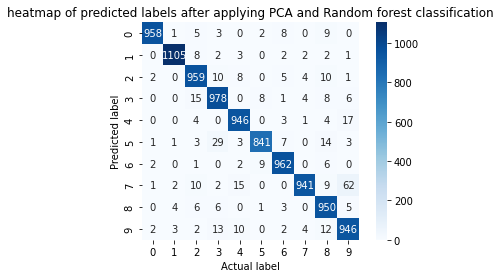

In [ ]:
#plotting confusion matrix to evaluate the model
CM_1=confusion_matrix(y_test, y_predict)
sns.heatmap(CM_1, square=True, annot=True, fmt='d', cbar=True, cmap="Blues")
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("heatmap of predicted labels after applying PCA and Random forest classification");

### Apply PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [ ]:
# YOUR CODE HERE
%%time
pca_reducer = PCA(n_components=0.95) # applying PCA with 0.95 threshold
pca_reducer.fit(x_train_transformed)
X_train_reduced = pca_reducer.transform(x_train_transformed)
X_test_reduced=pca_reducer.transform(x_test_transformed)
display(X_train_reduced.shape)
display(X_test_reduced.shape)
print('Commulative explained variance',np.sum(pca_reducer.explained_variance_ratio_))# checking the commulative explained various by PCA

(60000, 330)

(10000, 330)

Commulative explained variance 0.9501643962232235
CPU times: user 22.8 s, sys: 1.77 s, total: 24.5 s
Wall time: 15.3 s


In [ ]:
cumsum_img = np.cumsum(pca_reducer.explained_variance_ratio_)
d_img = np.argmax(cumsum_img >= 0.95) + 1

print('The number of dimensions required to preserve 95% of Fashion MNIST data set variance is {}.'.format(d_img))

The number of dimensions required to preserve 95% of Fashion MNIST data set variance is 330.


In [ ]:
approximation = pca_reducer.inverse_transform(X_train_reduced)

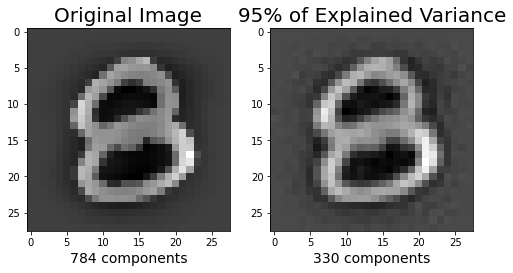

In [ ]:
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(x_train_transformed[3].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest');
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 330 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[3].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest');
plt.xlabel('330 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);

With 330 components and 95% explained variance PCA was able to maintain the shape of the image 8, however the image clarity in the image has experienced some losses. 

In [ ]:
# Setting Random Forest classifier using Grid search CV 
model_rfc_pca=RandomForestClassifier(random_state=123,n_jobs=-1)
rf_grid = {
    "n_estimators":[50,100,200],
    "max_depth":[5,10]
}

CV_rfc_pca=GridSearchCV(estimator=model_rfc_pca,param_grid=rf_grid,cv=5)

In [ ]:
%%time
# fitting the model on the PCA reduced x_train data and calculating the time of processing
start_time=time()
CV_rfc_pca.fit(X_train_reduced,y_train)
timing=time()-start_time

CPU times: user 5min 22s, sys: 4.99 s, total: 5min 27s
Wall time: 31min 43s


In [ ]:
print('Time taken by Random Forest after dimentionality Reduction (PCA) : '+str(round(timing/60,2))+' minutes')

Time taken by Random Forest after dimentionality Reduction (PCA) : 31.72 minutes


In [ ]:
print('Best tuned hyperparameter :',CV_rfc_pca.best_estimator_)
print('Random forest score : ',round(CV_rfc_pca.best_score_,3)*100,'%')

Best tuned hyperparameter : RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1,
                       random_state=123)
Random forest score :  91.0 %


In [ ]:
#predicting y values using the test set and checking its accuracy score
y_predict=CV_rfc_pca.best_estimator_.predict(X_test_reduced)
print('Test accuracy for Random Forest Classifier:'\
      , round(accuracy_score(y_test,y_predict)*100, 2), '%')

Test accuracy for Random Forest Classifier: 91.22 %


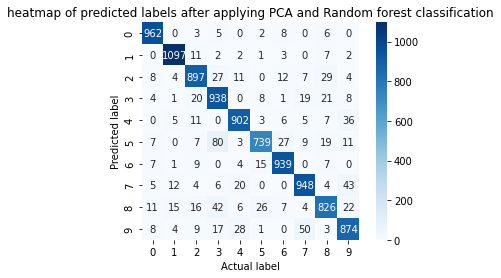

In [ ]:
#plotting confusion matrix for model evaluation
CM=confusion_matrix(y_test, y_predict)
sns.heatmap(CM, square=True, annot=True, fmt='d', cbar=True, cmap="Blues")
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("heatmap of predicted labels after applying PCA and Random forest classification");

The model performance actually dropped in accuracy as well as the computational time for random forest classification. Generally dimentionality reduction techniques are expected to decrease the computational time but in this it didnt happen that way. Perhaps with lesser features, Random forest tries to find the decision splits which become more convoluted and hence the algorithm is faced with higher comlexity and hence more computational times.
Also we saw how image clarity was affected with PCA reduction so perhaps this could also be the reason in slight lower model accuracy.

###Compare t-SNE,LLE & MDS to reduce the MNIST dataset, show result graphically.

In [ ]:
#For t-SNE and other dimenionality reduction techniques, creating a sample of 5000 data points to consider reasonable run times 
sample_data=data.sample(n=5000,random_state=123)
X_new=sample_data.loc[:,sample_data.columns != 'label']
y_new=sample_data['label']
X_new.head(2)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
21971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
model_scale=StandardScaler()
x_new_transformed=model_scale.fit_transform(X_new)
x_new_transformed

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# YOUR CODE HERE
%%time
# Applying t-SNE 
TSNE_reducer = TSNE(n_components=2,
        learning_rate="auto",
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0)
start_time = time()
X_reduced = TSNE_reducer.fit_transform(x_new_transformed)
timing = time() - start_time
display(X_reduced.shape)
display(X_reduced)



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(5000, 2)

array([[ 25.56535  ,  19.351067 ],
       [  8.835681 ,   7.5026307],
       [  8.123199 ,  13.492145 ],
       ...,
       [ 19.279808 ,  31.201029 ],
       [ -1.3892219, -21.150438 ],
       [ 12.219874 ,   4.299615 ]], dtype=float32)

CPU times: user 50.2 s, sys: 830 ms, total: 51 s
Wall time: 33.9 s


In [ ]:
#plotting data after applying t-SNE
title='TSNE in '+str(round(timing,2))+'s'
fig = px.scatter(x=X_reduced[:,0], y=X_reduced[:,1], color=y_new, title=title)

fig.update_layout(coloraxis_colorbar=dict(title='numbers'), height=1000)
fig.update_yaxes(scaleanchor = "x", scaleratio = 1)
fig.show()

In [ ]:
#applying LLE and calcutaling the processing time 
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=30, random_state=41,method="standard")
start_time = time()
X_reduced_lle = lle.fit_transform(x_new_transformed)
timing=time()-start_time


In [ ]:
#Plotting data points after applying LLE
title='LLE in '+str(round(timing,2))+'s'
fig2 = px.scatter(x=X_reduced_lle[:,0], y=X_reduced_lle[:,1], color=np.ravel(y_new), title=title)
fig2.update_layout(coloraxis_colorbar=dict(title='numbers'), height=1000)
fig2.update_yaxes(scaleanchor = "x", scaleratio = 1)
fig2.show()

In [ ]:
# YOR CODE HERE
%%time
#applying MDS
reducer_md = MDS(n_components=2,n_init=1, max_iter=120, n_jobs=2)
start_time=time()
X_reduced_md = reducer_md.fit_transform(x_new_transformed)
timing=time()-start_time


CPU times: user 1.93 s, sys: 489 ms, total: 2.42 s
Wall time: 1min 9s


In [ ]:
#plotting data points after applying MDS
title=title='MDS in '+str(round(timing,2))+'s'
fig = px.scatter(x=X_reduced_md[:,0], y=X_reduced_md[:,1], color=np.ravel(y_new), title=title)
fig.update_layout(coloraxis_colorbar=dict(title='Numbers'), height=1000)
fig.update_yaxes(scaleanchor = "x", scaleratio = 1)
fig.show()

## Conclusion

###<br><b> MDS</b></br>Multi dimentional scaling is a locally dimentionality reduction technique, which preserves the distances between the data points. So in MNIST dataset, we can see that it seems to have worked pretty well for digit 1 and somewhat for digit 9 as well, however as by definition, its unable to really distinguish the individual difference in different digits. MDS model works best to find the similarities by calculating distances between the data pairs and hence we see that almost all data points are cluttered in the same spatial space. Probably not the best way to classify MNIST dataset. Or perhaps, a 3D visualization may help us to visualise the separate clusters for each digit. Also the processing time for MDS technique was the highest on the sample dataset i.e. 69.34s


###<br><b> LLE </b></br>Locally Linear Embedding (LLE) is an unsupervised method for non-linear dimensionality reduction technique. It works best to discover non-linear structures in the data set, and also preserve the distances within local neighborhoods.In our 2D visualisation, it doesnt seem to be the best representation of the MNIST data classification. The data points are arranged in an upside V looking shape specially in the case of digits 1s and 2s. Perhaps the layout is suggesting how the handwritten imaging has some similarities matching a certain direction and the same digit perhaps tilted in other directions. Although its the shortest processing time in the dimentionality reduction technique but it has its limitations in being the best technique for MNIST dataset. One more reason is that LLE is an unsupervised method which assumes that data points are on or near a similar manifold and perhaps thats also a reason, we are unable to distinguish the individual classification of digits.

###<br><b> t-SNE </b></br>T-distributed stochastic neighbor embedding (tSNE) seems to be the best dimentionality reduction technique for MNIST dataset.t-SNE is also a non-linear dimentionality reduction technique. One of the best attributes of t-SNE is that it preserves the local structure of the data and can choose to preserve the global structure as well, which is probably why we see a clear visualisation of each digit in clear/distinct clusters. When a given point is embedded to a point in low-dimensions (in our case in 2 dimensions), the actual distances between the given point and the points in its neighbourhood are somewhat similar to the distances that were in 784-dimensions. Also the processing time is reasonable enough. In visualisation of t-SNE, we can see that almost all digit clusters are also split in 2 groups which is probably how different images are tilted in a certain direction. For instance we can see a clear cluster for digit 1. Similarly digits with lower curve at bottom or top have certain similarities and seem to have multiple clusters spread around. Overall t-SNE showed the best classification for MNIST dataset.